In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
     

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'San']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

IndexError: ignored

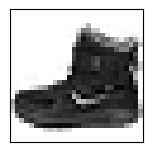

In [8]:
# Verify data is in correct format
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show

In [9]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5026 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3774 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3385 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3117 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2812 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2592 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2471 - accuracy: 0.9078
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.240

In [11]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print("\n Test accuracy = ", test_acc)

313/313 - 0s - loss: 0.3435 - accuracy: 0.8775 - 447ms/epoch - 1ms/step

 Test accuracy =  0.8774999976158142


In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
     

In [13]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [14]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

IndexError: ignored

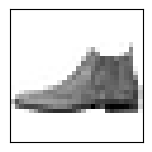

In [15]:
rows = 5
cols = 5
total_images = rows * cols
plt.figure(figsize = (2*2*cols, 2*rows))
for i in range(total_images):
  plt.subplot(rows, cols, i + 1)
  plot_image(i, predictions[i], test_labels, test_images)
plt.tight_layout()
plt.show()